Steps taken in the analysis


1. Importing the libraries <br>
2. Load the dataset <br>
3. Explore the dataset <br>
4. Data Cleaning <br>
5. Visualization <br>
6. Statistical Analysis


In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
# importing the dataset
euro_data=pd.read_csv('/content/euro2024_players.csv')

In [11]:
# checking the first 5 of the dataset
euro_data.head()


,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [12]:
# checking the last 5 of the dataset
euro_data.tail()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic
622,Tomas Chory,Centre-Forward,29,FC Viktoria Plzen,199,right,3,2,3200000,Czech Republic


In [16]:
# renaming the columns in the dataset
euro_column = euro_data.columns

for i in euro_column:
  euro_data.rename(columns={i:i.lower()},inplace=True)


euro_data

,name,position,age,club,height,foot,caps,goals,marketvalue,country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


In [17]:
# checking the number of rows and column
euro_data.shape

(623, 10)

In [18]:
# checking the information about the dataset
euro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   position     623 non-null    object
 2   age          623 non-null    int64 
 3   club         623 non-null    object
 4   height       623 non-null    int64 
 5   foot         620 non-null    object
 6   caps         623 non-null    int64 
 7   goals        623 non-null    int64 
 8   marketvalue  623 non-null    int64 
 9   country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [19]:
# checking the datatype of the columns in the dataset
euro_data.dtypes

,0
name,object
position,object
age,int64
club,object
height,int64
foot,object
caps,int64
goals,int64
marketvalue,int64
country,object


In [20]:
# checking the statistical information
round(euro_data.describe(),2)

,age,height,caps,goals,marketvalue
count,623.00,623.00,623.00,623.00,6.230000e+02
mean,27.04,184.18,30.34,4.15,1.840903e+07
std,4.12,6.57,30.99,10.09,2.426195e+07
min,16.00,167.00,0.00,0.00,5.000000e+04
25%,24.00,180.00,7.00,0.00,2.900000e+06
50%,27.00,185.00,21.00,1.00,9.000000e+06
75%,30.00,189.00,42.00,4.00,2.500000e+07
max,41.00,202.00,206.00,128.00,1.800000e+08


In [21]:
# checking the duplicate value in the dataset
euro_data.duplicated().sum()

0

In [22]:
# checking for the null value
euro_data.isnull().sum()

,0
name,0
position,0
age,0
club,0
height,0
foot,3
caps,0
goals,0
marketvalue,0
country,0


In [24]:
# filling the missing value in the foot column with the most occurrence
euro_data['foot'].fillna(euro_data['foot'].mode()[0],inplace=True)

In [26]:
# Verify there are no more missing values
euro_data.isnull().sum()

,0
name,0
position,0
age,0
club,0
height,0
foot,0
caps,0
goals,0
marketvalue,0
country,0


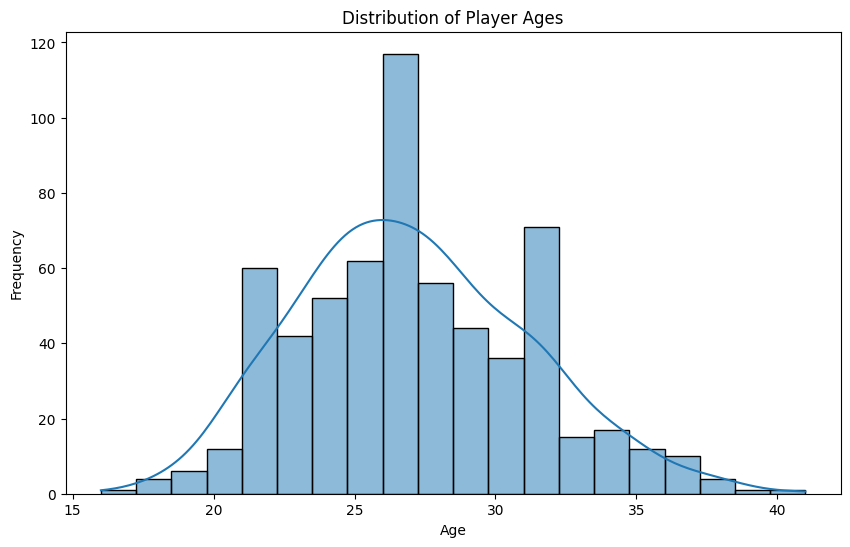

In [40]:
# Distribution of player age

plt.figure(figsize=(10,6))
sns.histplot(euro_data['age'],bins=20,kde=True)
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

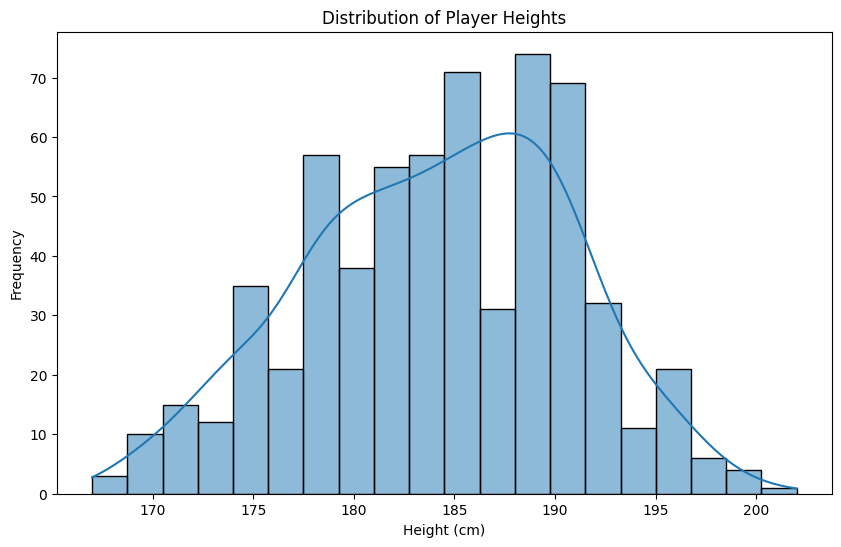

In [42]:
# Distribution of player heights
plt.figure(figsize=(10, 6))
sns.histplot(euro_data['height'], bins=20, kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-83-93dceb16bbf4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




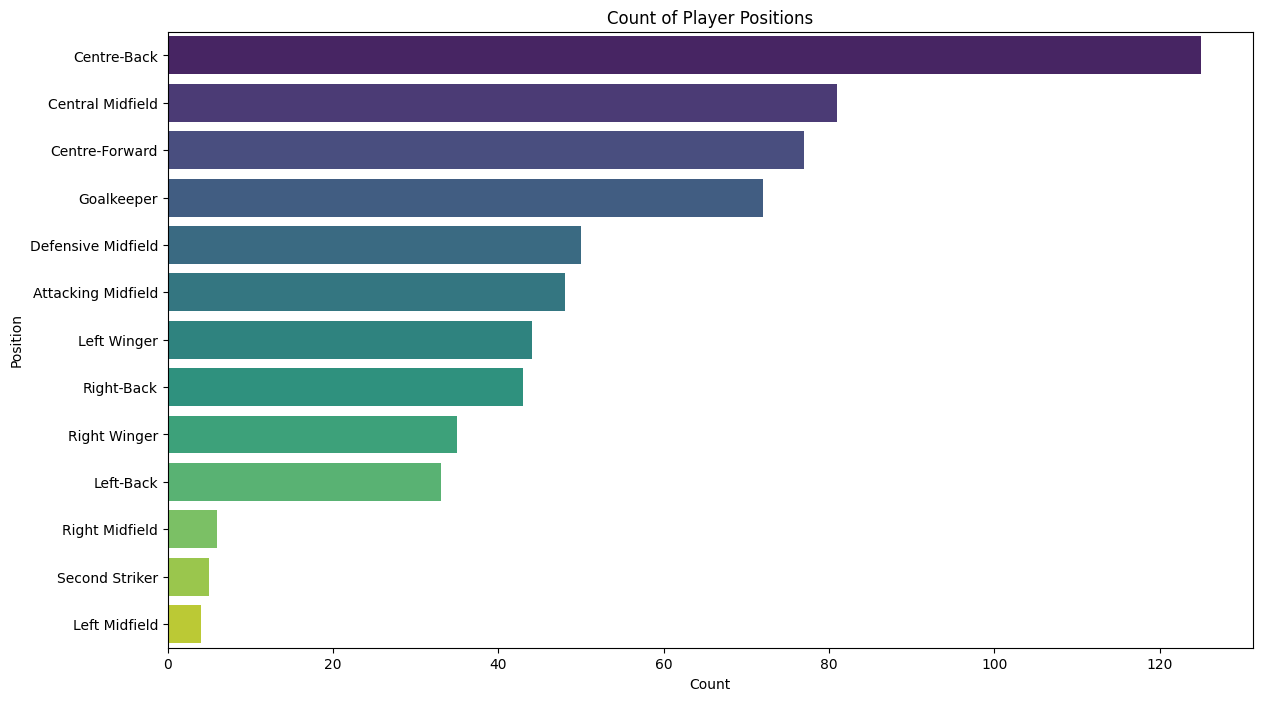

In [83]:
# Count of player positions
plt.figure(figsize=(14, 8))
sns.countplot(y='position', data=euro_data ,order=euro_data['position'].value_counts().index,palette='viridis')
plt.title('Count of Player Positions')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()

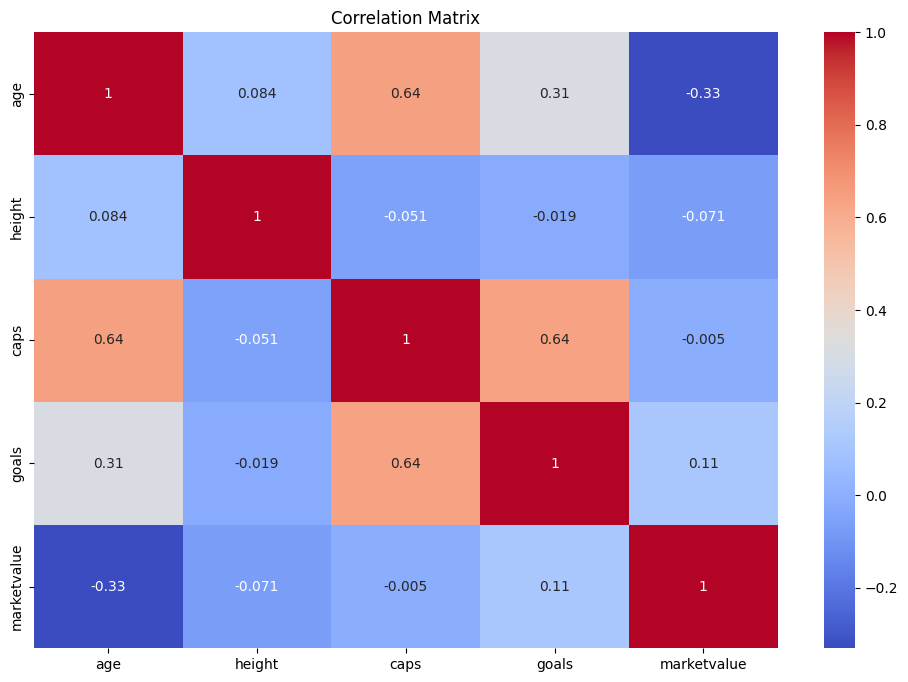

In [46]:
# Correlation matrix
euro_df = euro_data.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
correlation_matrix = euro_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

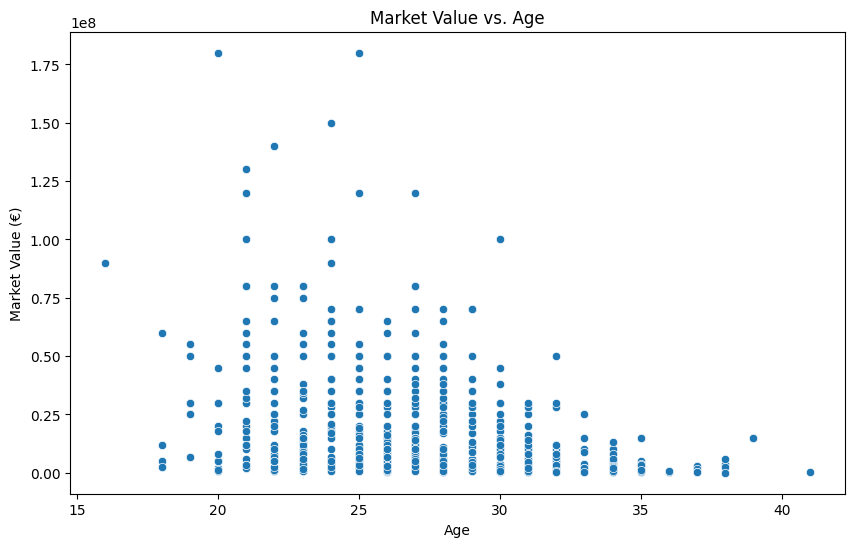

In [47]:
# Market value vs. age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='marketvalue', data=euro_data)
plt.title('Market Value vs. Age')
plt.xlabel('Age')
plt.ylabel('Market Value (€)')
plt.show()

In [50]:
# Average market value and goals by player position
grouped_df = euro_data.groupby('position')[['marketvalue', 'goals']].mean().round(2).sort_values(by='marketvalue', ascending=False)
grouped_df


,marketvalue,goals
position,,
Attacking Midfield,28935416.67,5.46
Right Winger,26692857.14,4.89
Defensive Midfield,21904000.00,2.38
Second Striker,21000000.00,12.20
Left Winger,20677272.73,5.43
Left-Back,20178787.88,1.06
Central Midfield,19834567.90,4.20
Centre-Forward,19181818.18,14.04
Centre-Back,15394400.00,1.45


In [51]:
euro_data.head()


,name,position,age,club,height,foot,caps,goals,marketvalue,country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [66]:
# grouping the club and name column
euro_club =euro_data.groupby('club')['name'].count().sort_values(ascending=False)[:10].reset_index()

In [67]:
euro_club

,club,name
0,Inter Milan,13
1,Manchester City,13
2,FC Barcelona,12
3,Real Madrid,12
4,Paris Saint-Germain,12
5,Bayern Munich,11
6,RB Leipzig,11
7,Arsenal FC,10
8,Bayer 04 Leverkusen,10
9,SK Slavia Prague,9


<ipython-input-82-36ab07f04a01>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




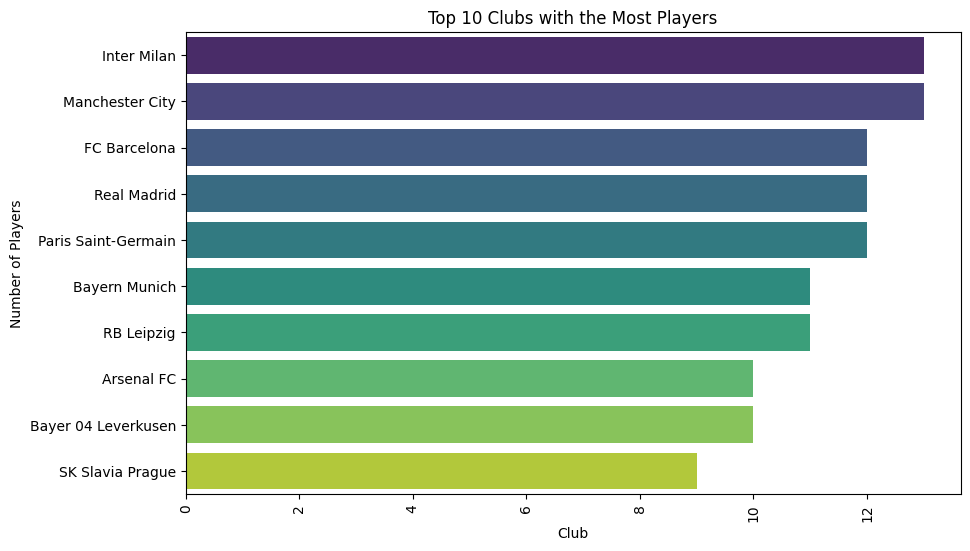

In [82]:
# visualizing the most club that have player in the concluding euro 2024
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='club', data=euro_club,palette='viridis')
plt.title('Top 10 Clubs with the Most Players')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

In [70]:
euro_data.head(5)

,name,position,age,club,height,foot,caps,goals,marketvalue,country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [75]:
# grouping the name and goals
euro_goals = euro_data.groupby('name')['caps'].sum().sort_values(ascending=False)[:10].reset_index()
euro_goals


,name,caps
0,Cristiano Ronaldo,206
1,Luka Modric,174
2,Jan Vertonghen,154
3,Robert Lewandowski,149
4,Pepe,136
5,Olivier Giroud,132
6,Simon Kjær,131
7,Axel Witsel,131
8,Ivan Perisic,130
9,Thomas Müller,129


<ipython-input-81-7b00e37ff009>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




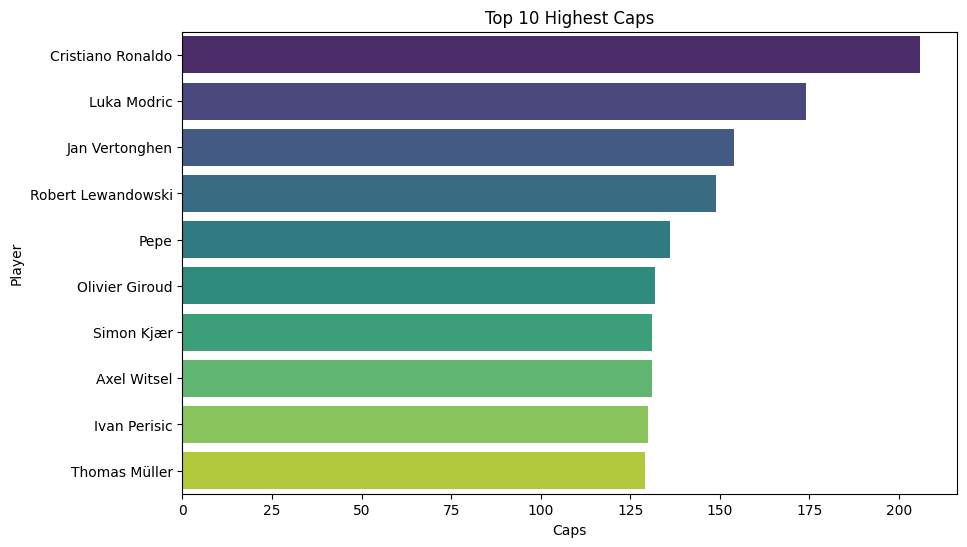

In [81]:
# visiualizing the top 10 highest goal scorer
plt.figure(figsize=(10, 6))
sns.barplot(x='caps', y='name', data=euro_goals,palette='viridis')
plt.title('Top 10 Highest Caps')
plt.xlabel('Caps')
plt.ylabel('Player')
plt.show()

In [84]:
euro_data.head()

,name,position,age,club,height,foot,caps,goals,marketvalue,country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [86]:
# grouping position with the market value
euro_position = euro_data.groupby('position')['marketvalue'].mean().round(2).sort_values(ascending=False)[:10].reset_index()
euro_position

,position,marketvalue
0,Attacking Midfield,28935416.67
1,Right Winger,26692857.14
2,Defensive Midfield,21904000.00
3,Second Striker,21000000.00
4,Left Winger,20677272.73
5,Left-Back,20178787.88
6,Central Midfield,19834567.90
7,Centre-Forward,19181818.18
8,Centre-Back,15394400.00
9,Right Midfield,15266666.67


<ipython-input-87-a42494cb3305>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




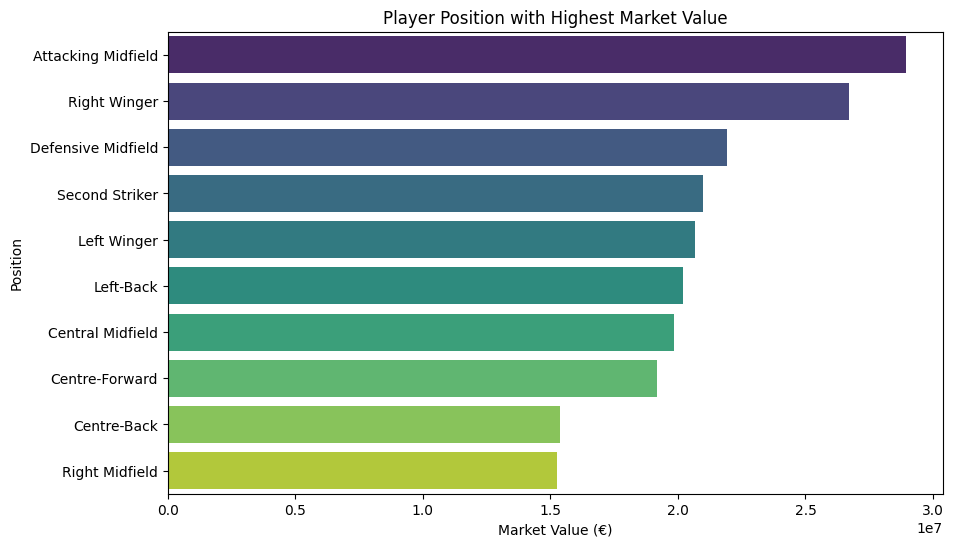

In [87]:
# visualizing of the player position with their market value
plt.figure(figsize=(10, 6))
sns.barplot(x='marketvalue', y='position', data=euro_position,palette='viridis')
plt.title('Player Position with Highest Market Value')
plt.xlabel('Market Value (€)')
plt.ylabel('Position')
plt.show()


In [88]:
# grouping position with the market value
euro_age = euro_data.groupby('age')['marketvalue'].mean().round(2).sort_values(ascending=False)[:10].reset_index()
euro_age

,age,marketvalue
0,16,90000000.00
1,21,36170967.74
2,19,32833333.33
3,20,28766666.67
4,22,28758620.69
5,24,26253846.15
6,25,23696774.19
7,27,22705084.75
8,23,20066666.67
9,18,19875000.00


Recommendations and Insights


**Player Valuation:** Younger players generally have higher market values, so clubs may focus on investing in younger talent. <br>
**Position Importance:** Attacking Midfielders and Wingers are highly valued, reflecting their crucial roles in creating scoring opportunities.<br>
**Strikers' Value:** Centre-Forwards have high goal averages, making them valuable assets for teams needing scoring capabilities.